In [1]:
import numpy as np
import matplotlib.pyplot as plt

import cv2

In [18]:
def read_pgm(file_path):
    return cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

def yuv_to_rgb(frame):
    y_border = 2 * frame.shape[0] // 3
    Y = frame[:y_border, :]

    U = frame[y_border:, frame.shape[1] // 2:].repeat(2, axis = 0).repeat(2, axis = 1)
    V = frame[y_border:, :frame.shape[1] // 2].repeat(2, axis = 0).repeat(2, axis = 1)

    yuv = np.stack((Y, U, V), axis=-1).astype(np.float32)
    
    m = np.array([[ 1.0, 1.0, 1.0],
                 [-0.000007154783816076815, -0.3441331386566162, 1.7720025777816772],
                 [ 1.4019975662231445, -0.7141380310058594 , 0.00001542569043522235] ])
    
    rgb = np.dot(yuv,m)
    rgb[:,:,0]-=179.45477266423404
    rgb[:,:,1]+=135.45870971679688
    rgb[:,:,2]-=226.8183044444304
    rgb = rgb.clip(0,255)

    return rgb

In [19]:
img.min(), img.max()

(6, 246)

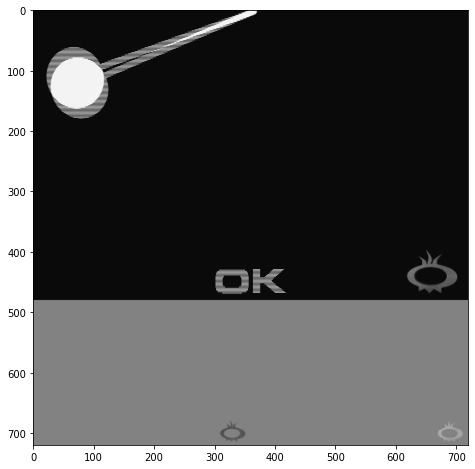

In [20]:
file_path = 'videos/elementary/pendulum_pgm/5.pgm'
img = read_pgm(file_path)
plt.figure(figsize=(16, 8))
plt.imshow(img, cmap='gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


float64


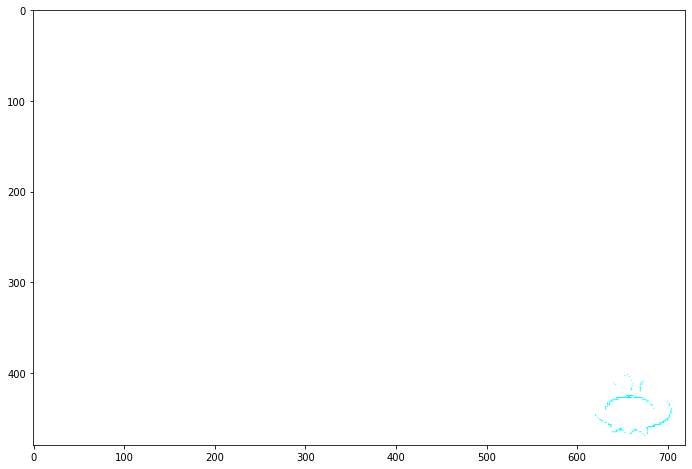

In [21]:
rgb = yuv_to_rgb(img)
print(rgb.dtype)
plt.figure(figsize=(16, 8))
plt.imshow(rgb)

In [22]:
rgb.min(), rgb.max()

(0.0, 246.0)